In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip


# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [8]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/technology/'
ex_dir = '../../data/processed/external/schmoch/'
output_dir = '../../output/'


In [5]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM


In [21]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv', 
                 sep=',')
schmoch_df = pd.read_csv(f'{ex_dir}35.csv', 
                         encoding='utf-8', 
                         sep=',', 
                         usecols=['Field_number', 'Field_en']
                         ).drop_duplicates()
df = pd.merge(df, schmoch_df, left_on=classification, 
              right_on='Field_number', how='left').drop(columns=['Field_number', classification])\
    .rename(columns={'Field_en': classification})
df

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
0,1981-1990,48775,477,118,-1.121,6.695,120.598,7.093,122.545,7.264,...,125.989,7.439,126.213,7.447,126.346,7.452,126.424,7.455,126.469,"Electrical machinery, apparatus, energy"
1,1981-1990,50732,408,81,-2.276,6.358,101.657,6.933,113.578,7.165,...,125.336,7.422,125.855,7.438,126.147,7.447,126.312,7.452,126.406,Audio-visual technology
2,1981-1990,22941,277,73,-2.817,6.589,97.554,6.944,111.138,7.123,...,125.088,7.414,125.713,7.432,126.064,7.444,126.264,7.450,126.378,Telecommunications
3,1981-1990,4090,135,52,-3.204,7.135,92.935,6.973,109.148,7.097,...,124.901,7.408,125.606,7.429,126.004,7.441,126.229,7.449,126.358,Digital communication
4,1981-1990,11636,215,77,-2.926,6.675,97.499,6.934,110.655,7.116,...,125.029,7.412,125.679,7.432,126.046,7.443,126.254,7.450,126.372,Basic communication processes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2001-2010,27100,462,125,0.252,6.912,125.841,7.245,125.305,7.449,...,122.847,7.626,122.771,7.631,122.737,7.633,122.722,7.634,122.715,Mechanical elements
136,2001-2010,53960,340,99,0.021,5.939,124.112,7.042,124.842,7.387,...,122.807,7.623,122.748,7.629,122.724,7.632,122.714,7.633,122.711,Transport
137,2001-2010,51674,350,67,-1.156,4.164,93.915,5.931,109.226,6.809,...,122.079,7.589,122.408,7.612,122.563,7.624,122.637,7.629,122.673,"Furniture, games"
138,2001-2010,13886,362,84,-0.062,7.071,112.042,7.349,119.192,7.504,...,122.605,7.628,122.661,7.631,122.686,7.633,122.698,7.634,122.703,Other consumer goods


In [24]:
schmoch_df[schmoch_df['Field_en'].str.contains('nano')]

,Field_number,Field_en
307,22,Micro-structural and nano-technology


In [23]:
df[df[classification].str.contains('nano')]

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
21,1981-1990,0,1,1,1.967,13.000,116.692,8.527,127.567,7.873,...,127.198,7.494,126.944,7.479,126.781,7.470,126.681,7.466,126.620,Micro-structural and nano-technology
56,1981-2010,688,108,77,-0.796,8.688,118.271,7.928,124.449,7.830,...,127.910,7.845,128.088,7.849,128.191,7.852,128.250,7.854,128.285,Micro-structural and nano-technology
91,1991-2000,90,35,29,-0.953,9.207,109.731,7.778,121.725,7.658,...,126.637,7.701,126.853,7.706,126.979,7.709,127.051,7.711,127.093,Micro-structural and nano-technology
126,2001-2010,598,99,74,-0.585,8.986,116.039,7.852,120.486,7.683,...,122.524,7.633,122.610,7.634,122.656,7.634,122.681,7.634,122.694,Micro-structural and nano-technology


In [ ]:
for period in schmoch_df['period']

c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


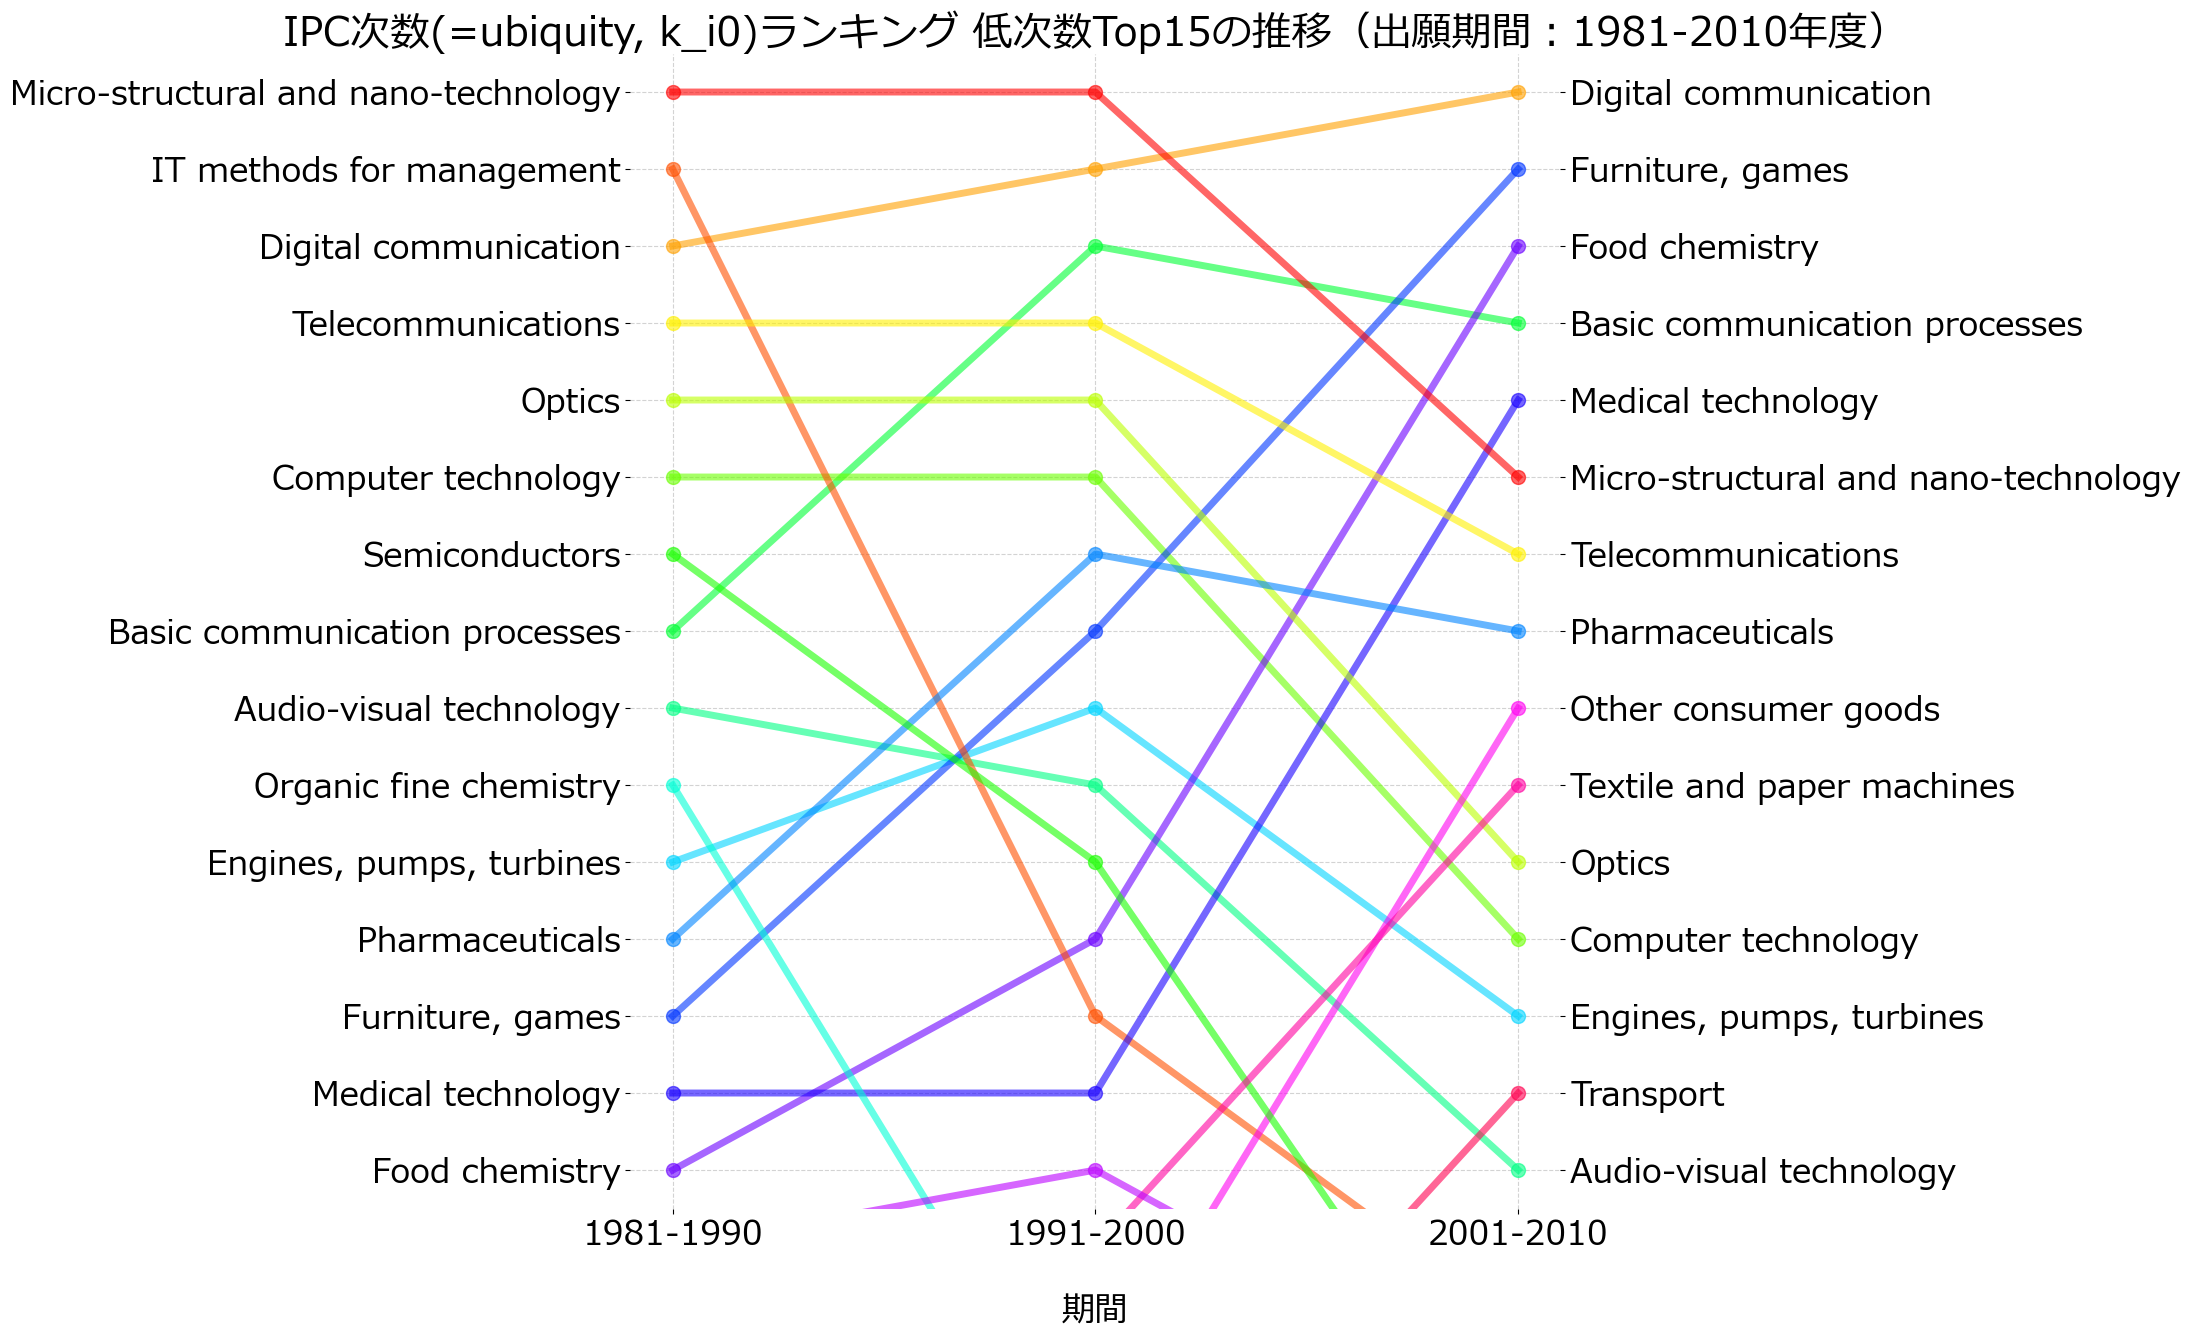

c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


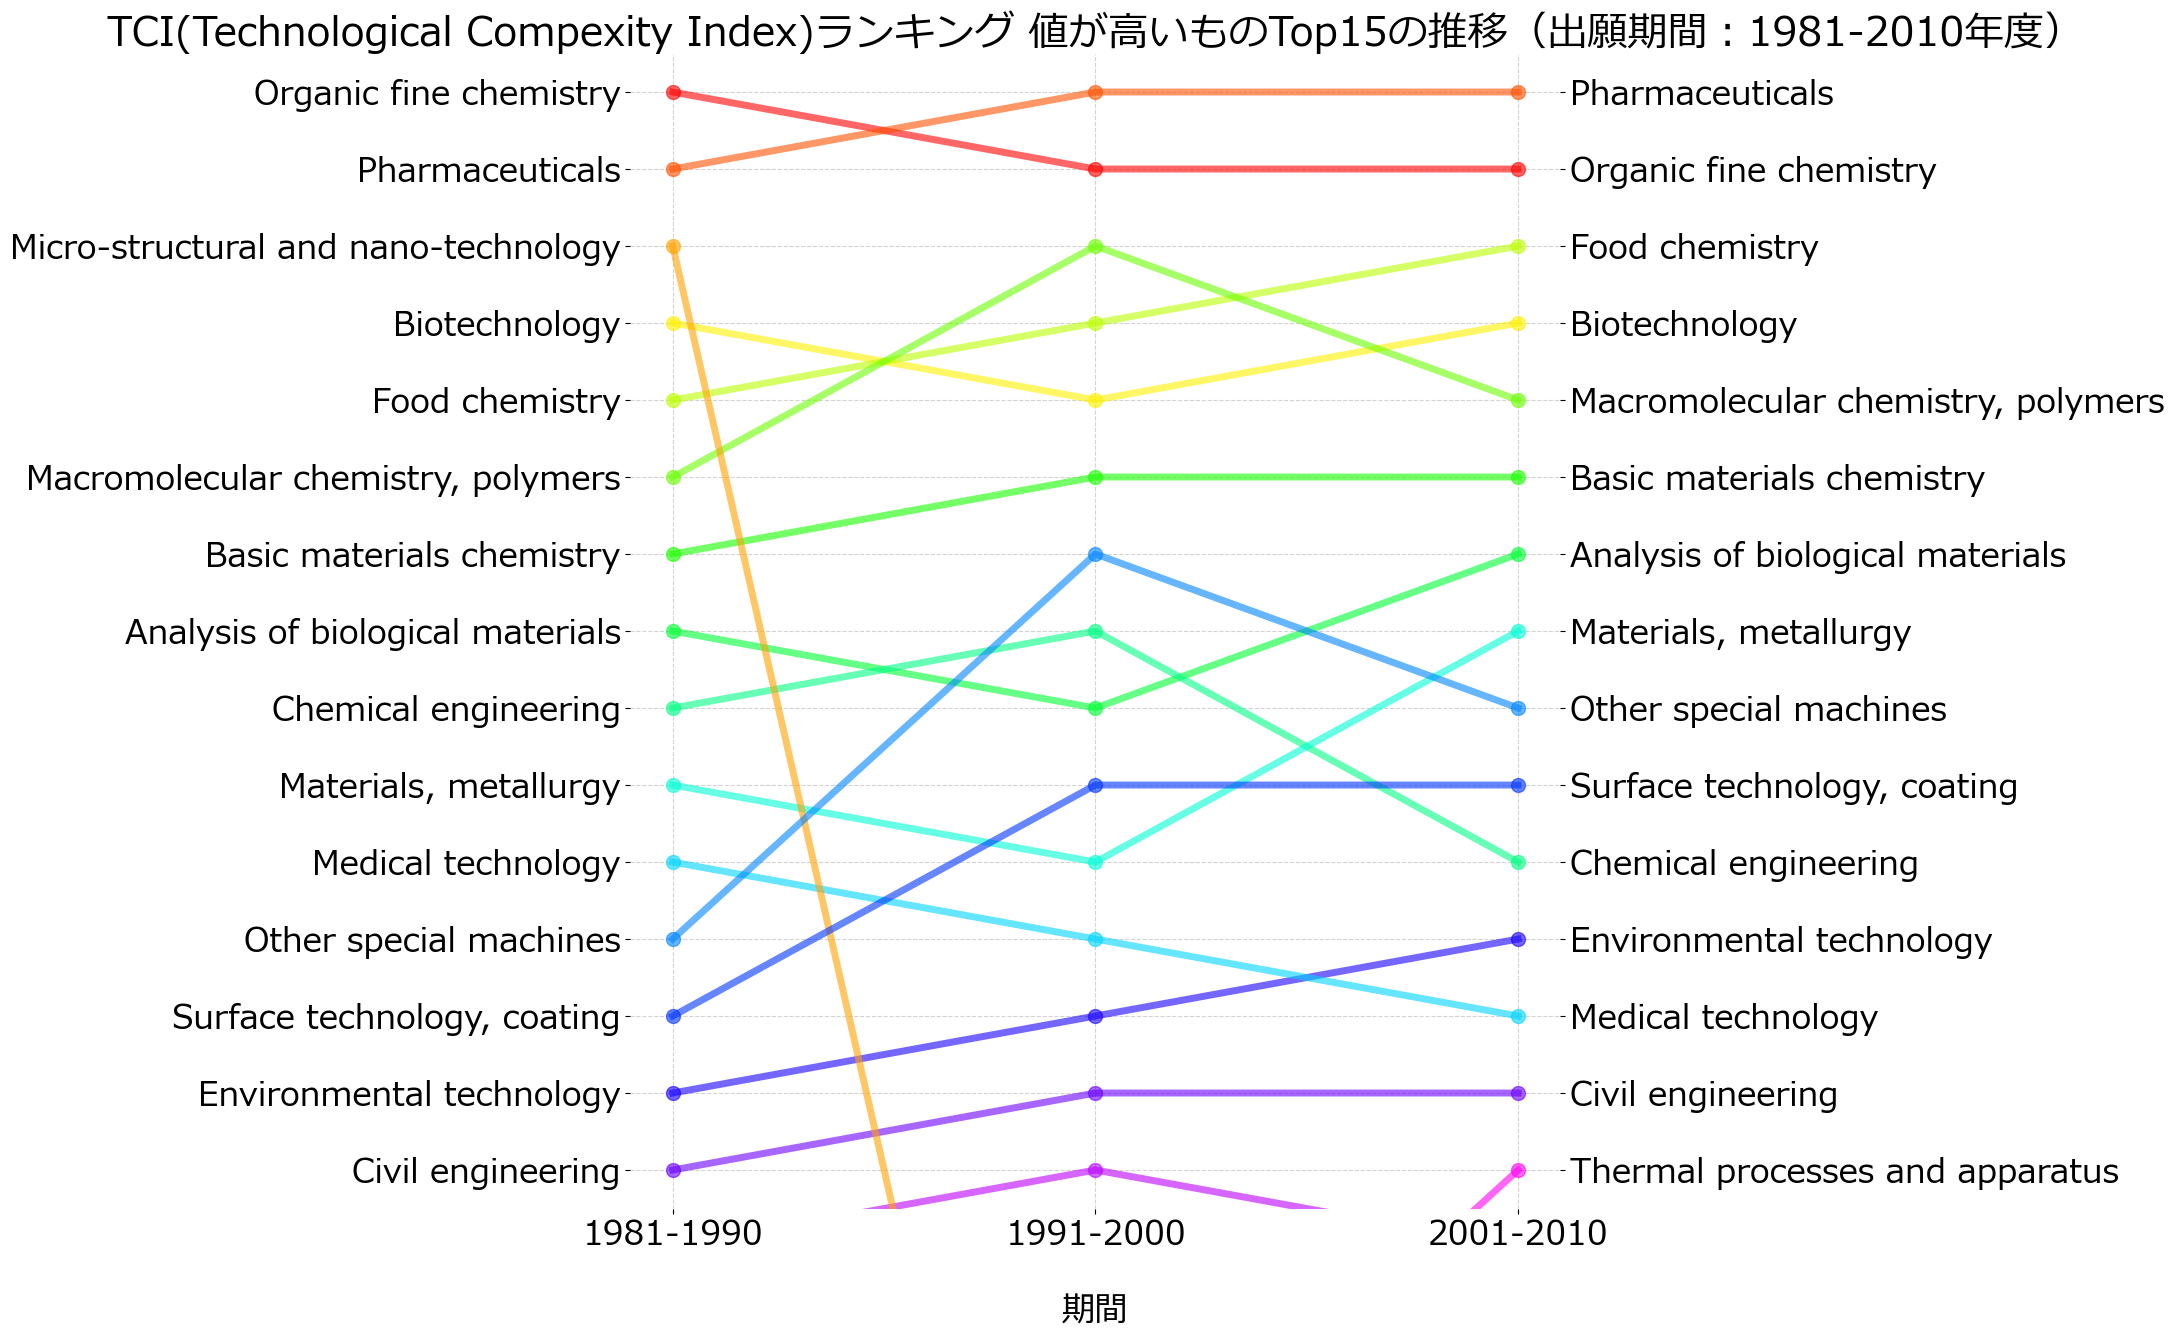

In [26]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              5: [classification, 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }


for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    # plt.savefig(f'../Fig/Rank/p{p}/{combi[2]}{year_range}年ごと.png')
    plt.show()
